#  Predicting Student Exam Scores Using Machine Learning

##  Problem Statement

Academic success in Spain’s *Título de Bachiller* system is influenced by various factors such as study habits, parental background, attendance, and support systems. In this project, we aim to build a machine learning model that can predict a student's final **Exam Score**, helping identify students at academic risk for early intervention.

---

##  Objective

To develop regression models that can accurately predict the `Exam_Score` using features such as:
- Hours studied per week
- Attendance
- Tutoring support
- Gender
- Region (Urban/Rural)
- Parent's education level

In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [445]:
data=pd.read_csv(r"C:\Users\HP\Downloads\Final Projects Machine Learning\Final Projects Machine Learning\Project 1.0\Test\Test\SAP-4000.csv")
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,Tertiary,43.5
1,Female,6.8,No,Urban,62.0,Primary,51.7
2,Female,9.7,No,Rural,95.0,Secondary,70.1
3,Male,13.3,Yes,Rural,52.9,NaN,79.5
4,Female,8.9,No,Urban,50.8,NaN,52.2


##  Step 1: Data Preprocessing

- Handle missing values (if any).
- Convert categorical data to numerical:
  - **Label Encoding** for `ParentEducation` (ordinal).
  - **One-Hot Encoding** for `Gender`, `Region`, `Tutoring` (nominal).
- Normalize/scale numeric features if needed (optional).

In [447]:
data.shape

(4000, 7)

In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             4000 non-null   object 
 1   HoursStudied/Week  4000 non-null   float64
 2   Tutoring           4000 non-null   object 
 3   Region             4000 non-null   object 
 4   Attendance(%)      4000 non-null   float64
 5   Parent Education   3578 non-null   object 
 6   Exam_Score         4000 non-null   float64
dtypes: float64(3), object(4)
memory usage: 218.9+ KB


In [449]:
data.isna().sum()

Gender                 0
HoursStudied/Week      0
Tutoring               0
Region                 0
Attendance(%)          0
Parent Education     422
Exam_Score             0
dtype: int64

In [450]:
data.describe()

,HoursStudied/Week,Attendance(%),Exam_Score
count,4000.000000,4000.000000,4000.000000
mean,9.861025,75.224150,71.107775
std,3.713801,14.496906,16.748950
min,0.000000,50.000000,16.600000
25%,7.400000,62.600000,59.300000
50%,9.900000,75.600000,71.550000
75%,12.600000,87.700000,83.500000
max,16.000000,100.000000,100.000000


In [451]:
#Fill the null values.
data['Parent Education']=data['Parent Education'].fillna(data['Parent Education'].mode()[0])

In [452]:
# Convert categorical data to numerical:
#Label Encoding for ParentEducation (ordinal).
#One-Hot Encoding for Gender, Region, Tutoring (nominal).

In [453]:
from sklearn.preprocessing import LabelEncoder

In [454]:
label_enc=LabelEncoder()

In [455]:
df1=label_enc.fit_transform(data['Parent Education'])

In [456]:
data['Parent Education']=df1
data.head()

,Gender,HoursStudied/Week,Tutoring,Region,Attendance(%),Parent Education,Exam_Score
0,Male,5.5,No,Urban,72.7,2,43.5
1,Female,6.8,No,Urban,62.0,0,51.7
2,Female,9.7,No,Rural,95.0,1,70.1
3,Male,13.3,Yes,Rural,52.9,1,79.5
4,Female,8.9,No,Urban,50.8,1,52.2


In [457]:
from sklearn.preprocessing import  OneHotEncoder
from sklearn.compose import make_column_transformer

In [458]:
one_he=OneHotEncoder()

In [459]:
df2=make_column_transformer(
    (one_he,['Gender', 'Region', 'Tutoring']),remainder='passthrough')

In [460]:
encoded_data=pd.DataFrame(df2.fit_transform(data))
encoded_data

,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,1.0,1.0,0.0,5.5,72.7,2.0,43.5
1,1.0,0.0,0.0,1.0,1.0,0.0,6.8,62.0,0.0,51.7
2,1.0,0.0,1.0,0.0,1.0,0.0,9.7,95.0,1.0,70.1
3,0.0,1.0,1.0,0.0,0.0,1.0,13.3,52.9,1.0,79.5
4,1.0,0.0,0.0,1.0,1.0,0.0,8.9,50.8,1.0,52.2
...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,1.0,0.0,1.0,11.3,79.5,1.0,93.5
3996,0.0,1.0,0.0,1.0,0.0,1.0,3.7,50.7,2.0,53.8
3997,1.0,0.0,1.0,0.0,1.0,0.0,0.0,72.7,2.0,25.4
3998,0.0,1.0,0.0,1.0,1.0,0.0,4.0,62.2,2.0,40.3


In [461]:
#Change the columns name based on "encoded_data"
final_data=pd.DataFrame(df2.fit_transform(data),columns=['GenderMale','GenderFemale','Rural_Region','Urban_Region','No_Tutoring','Tutoring','HoursStudied',
                                                           'Attendance_Percentage','ParentEducation','Exam_Score'])
final_data

,GenderMale,GenderFemale,Rural_Region,Urban_Region,No_Tutoring,Tutoring,HoursStudied,Attendance_Percentage,ParentEducation,Exam_Score
0,0.0,1.0,0.0,1.0,1.0,0.0,5.5,72.7,2.0,43.5
1,1.0,0.0,0.0,1.0,1.0,0.0,6.8,62.0,0.0,51.7
2,1.0,0.0,1.0,0.0,1.0,0.0,9.7,95.0,1.0,70.1
3,0.0,1.0,1.0,0.0,0.0,1.0,13.3,52.9,1.0,79.5
4,1.0,0.0,0.0,1.0,1.0,0.0,8.9,50.8,1.0,52.2
...,...,...,...,...,...,...,...,...,...,...
3995,0.0,1.0,0.0,1.0,0.0,1.0,11.3,79.5,1.0,93.5
3996,0.0,1.0,0.0,1.0,0.0,1.0,3.7,50.7,2.0,53.8
3997,1.0,0.0,1.0,0.0,1.0,0.0,0.0,72.7,2.0,25.4
3998,0.0,1.0,0.0,1.0,1.0,0.0,4.0,62.2,2.0,40.3


##  Step 2: Feature Selection

- **Heatmap:** Visualize correlation between numerical features and `Exam_Score`.
- **SelectKBest:** Use `f_regression` to select top relevant features.

In [463]:
data_correl=final_data.corr().abs()

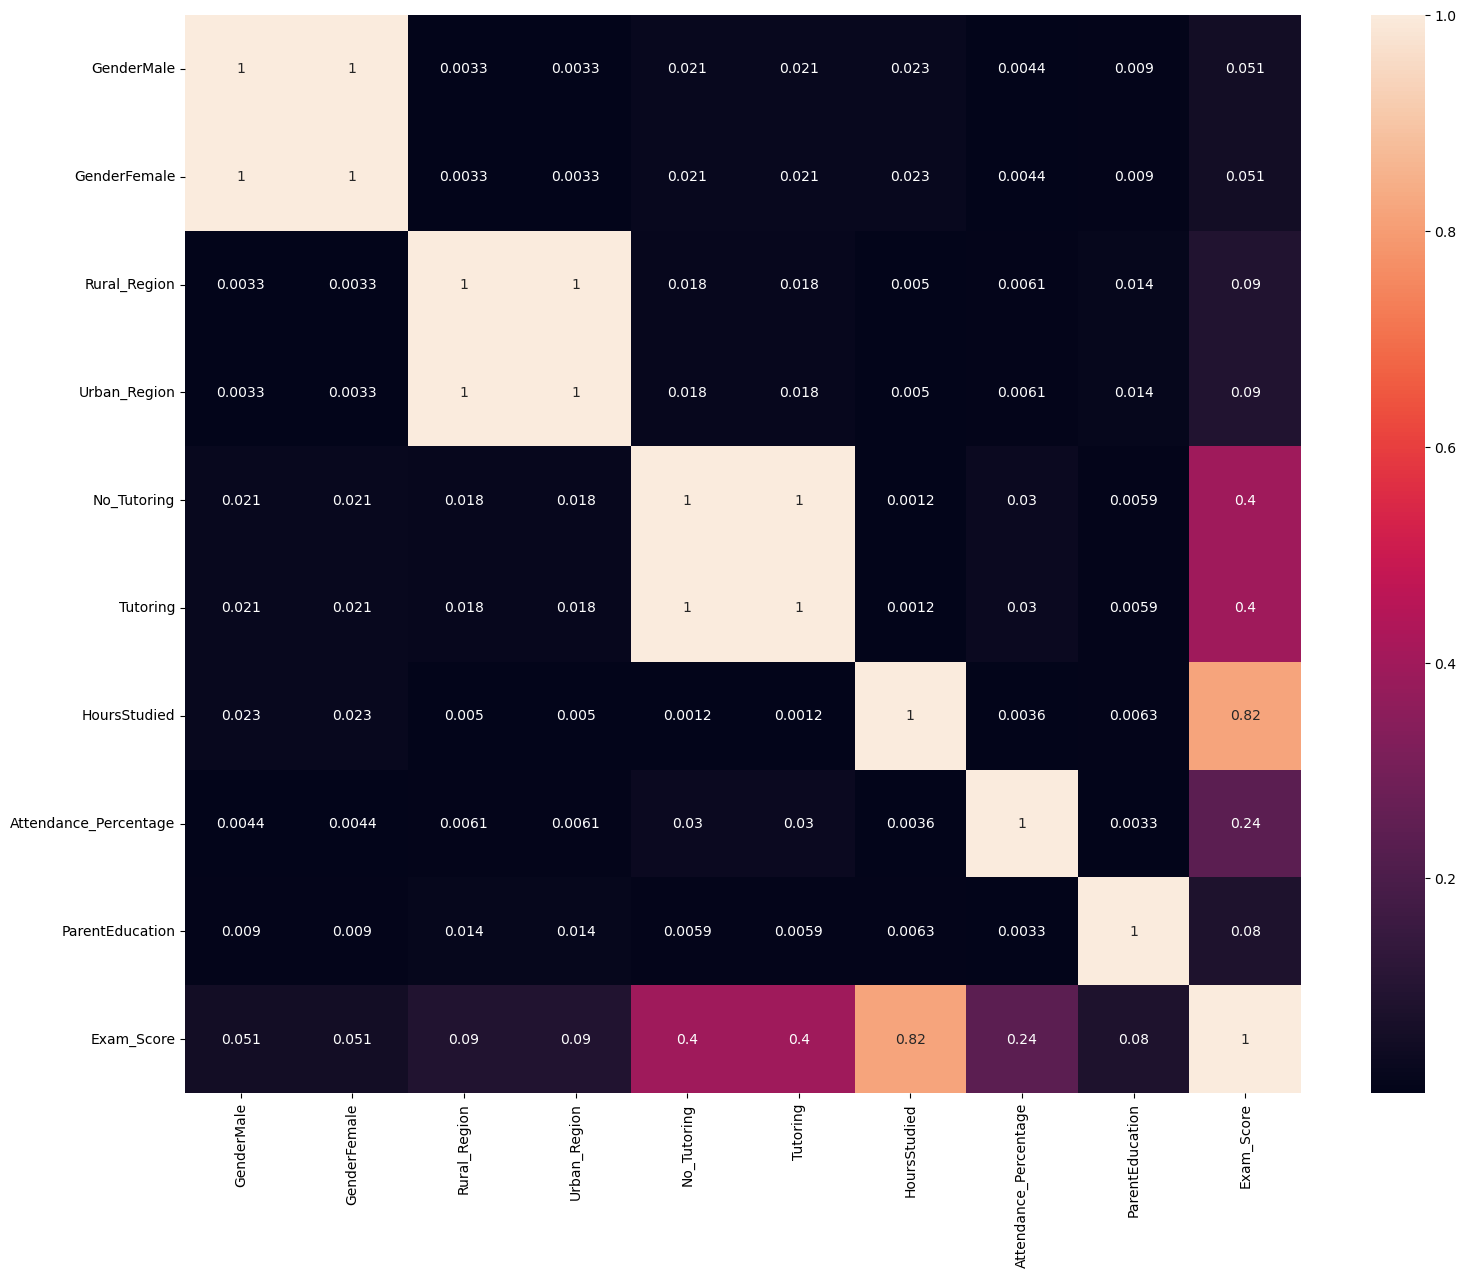

In [464]:
plt.figure(figsize=(18,14))
sns.heatmap(data_correl,annot=True,annot_kws={'size':10})
plt.show()

In [465]:
#SelectKBest: Use f_regression to select top relevant features.
from sklearn.feature_selection import SelectKBest, f_regression

In [466]:
# Define x and y
x = final_data.drop(columns=['Exam_Score'])  # Features
y = final_data['Exam_Score']                 # target variable

In [467]:
selector = SelectKBest(score_func=f_regression, k=7)  # assigned k =7
x_new = selector.fit_transform(x, y)

In [468]:
selected_f = selector.get_support()
selected_f = x.columns[selected_f]
selected_f

Index(['Rural_Region', 'Urban_Region', 'No_Tutoring', 'Tutoring',
       'HoursStudied', 'Attendance_Percentage', 'ParentEducation'],
      dtype='object')

In [469]:
x = final_data[selected_f]

##  Step 3: Model Building

We will train the following regression models to predict `Exam_Score`:

- Linear Regression

- DecisionTreeRegression

#### Linear Regression

In [472]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [473]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [474]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [475]:
y_pred = model.predict(x_test)

In [476]:
y_pred

array([ 73.40073959,  63.26506764,  92.77960373,  88.46794255,
        65.73811378,  65.56953134,  82.29853215,  75.14313369,
        55.68542679,  76.52166869,  58.27288141,  71.06038868,
        71.34668196,  57.90265783,  55.58581584,  71.80469981,
        35.68129658,  75.20008128,  52.23823987,  79.27341741,
        87.88820375,  99.11212651,  79.79256569,  48.00956113,
        70.49455549,  58.99212458,  69.64761192,  85.94638187,
        78.7761109 ,  70.22169264,  80.13244959,  88.3833032 ,
        55.11018221,  66.71066504, 101.97676532,  89.19755138,
        87.49081064,  74.13925414,  43.30549529,  73.50611664,
        53.55298627,  90.24117947,  63.63717427,  64.38129348,
        68.02976716,  82.79253245,  82.66220573,  63.80570329,
        84.23578231,  70.41254887,  64.19505211,  88.67607909,
        74.89462212,  69.69010121,  55.35482218,  48.66287351,
        82.92408537,  69.27306063,  78.07961683,  74.01641513,
        82.24722985,  65.95417006,  82.65268884,  57.98

In [477]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MSE):", mean_absolute_error(y_test, y_pred))

R² Score: 0.9106432455720739
Mean Absolute Error (MSE): 4.091788038358001


In [478]:
#RMSE
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error (RMSE):",  rmse)

Root Mean Squared Error (RMSE): 5.171767941508445


In [479]:
# Prediction on train and test dat
y_train_pred1 = model.predict(x_train)
y_test_pred1 = model.predict(x_test)

In [480]:
y_train_pred1

array([72.67975825, 56.33157799, 63.49572835, ..., 67.3002879 ,
       49.18710932, 65.53566316])

In [481]:
y_test_pred1

array([ 73.40073959,  63.26506764,  92.77960373,  88.46794255,
        65.73811378,  65.56953134,  82.29853215,  75.14313369,
        55.68542679,  76.52166869,  58.27288141,  71.06038868,
        71.34668196,  57.90265783,  55.58581584,  71.80469981,
        35.68129658,  75.20008128,  52.23823987,  79.27341741,
        87.88820375,  99.11212651,  79.79256569,  48.00956113,
        70.49455549,  58.99212458,  69.64761192,  85.94638187,
        78.7761109 ,  70.22169264,  80.13244959,  88.3833032 ,
        55.11018221,  66.71066504, 101.97676532,  89.19755138,
        87.49081064,  74.13925414,  43.30549529,  73.50611664,
        53.55298627,  90.24117947,  63.63717427,  64.38129348,
        68.02976716,  82.79253245,  82.66220573,  63.80570329,
        84.23578231,  70.41254887,  64.19505211,  88.67607909,
        74.89462212,  69.69010121,  55.35482218,  48.66287351,
        82.92408537,  69.27306063,  78.07961683,  74.01641513,
        82.24722985,  65.95417006,  82.65268884,  57.98

In [482]:
#matrics of train data
r2_train1 = r2_score(y_train, y_train_pred1)
mae_train1 = mean_absolute_error(y_train, y_train_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
print("R² Score of training data:", r2_train1)
print("MAE of training data:", mae_train1)
print("RMSE of training data:", rmse_train1)

R² Score of training data: 0.9015935206245486
MAE of training data: 4.159935941909591
RMSE of training data: 5.2089126939148676


In [483]:
#matrics of test data
r2_test1 = r2_score(y_test, y_test_pred1)
mae_test1 = mean_absolute_error(y_test, y_test_pred1)
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
print("R² Score of testing data:", r2_test1)
print("MAE of testing data:", mae_test1)
print("RMSE of testing data:", rmse_test1)

R² Score of testing data: 0.9106432455720739
MAE of testing data: 4.091788038358001
RMSE of testing data: 5.171767941508445


### DecisionTreeRegressor

In [485]:
# For model prepration
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [486]:
data_model = DecisionTreeRegressor(random_state=42)
data_model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [487]:
y_pred2 = data_model.predict(x_test)
y_pred2

array([ 62.2 ,  62.6 ,  97.2 ,  89.2 ,  69.6 ,  67.9 ,  88.9 ,  75.8 ,
        50.9 ,  80.4 ,  50.6 ,  74.2 ,  75.1 ,  61.4 ,  53.  ,  79.3 ,
        41.9 ,  77.  ,  57.3 ,  78.8 ,  90.9 , 100.  ,  81.2 ,  42.9 ,
        67.3 ,  55.6 ,  72.2 ,  88.6 ,  68.5 ,  72.9 ,  78.3 ,  86.3 ,
        52.3 ,  68.4 , 100.  ,  89.2 ,  89.9 ,  69.2 ,  34.8 ,  75.7 ,
        56.4 ,  80.9 ,  58.8 ,  72.2 ,  66.9 ,  77.3 ,  72.  ,  67.3 ,
        89.4 ,  73.5 ,  75.3 ,  89.4 ,  74.1 ,  74.3 ,  61.9 ,  45.9 ,
        81.8 ,  66.2 ,  74.9 ,  75.5 ,  78.9 ,  63.2 ,  83.6 ,  50.3 ,
        59.3 ,  33.7 ,  71.  ,  82.4 ,  63.2 , 100.  ,  59.8 ,  62.4 ,
        70.6 ,  72.4 ,  99.2 ,  71.4 ,  97.  ,  60.7 ,  71.5 ,  91.8 ,
        99.8 ,  88.9 ,  79.7 ,  37.  ,  65.8 ,  62.3 ,  57.2 ,  90.2 ,
        68.  ,  65.9 ,  75.6 ,  67.1 ,  64.1 ,  40.2 ,  93.4 ,  76.3 ,
        60.1 ,  68.8 ,  74.1 ,  94.  ,  31.7 ,  84.9 ,  50.7 ,  87.8 ,
        47.  ,  47.  ,  71.4 , 100.  ,  65.4 ,  87.3 ,  90.1 ,  61.8 ,
      

In [488]:
print("r² Score:", r2_score(y_test, y_pred2))
print("Mean Absolute Error (MSE):", mean_absolute_error(y_test, y_pred2))

r² Score: 0.8109015221052897
Mean Absolute Error (MSE): 5.7756875


In [489]:
#RMSE
rmse=np.sqrt(mean_squared_error(y_test,y_pred2))
print("Root Mean Squared Error (RMSE):",  rmse)

Root Mean Squared Error (RMSE): 7.523490089380061


In [490]:
# Prediction on train and test dat
y_train_pred2 = data_model.predict(x_train)
y_test_pred2 = data_model.predict(x_test)

In [491]:
#matrics of train data
r2_train2 = r2_score(y_train, y_train_pred2)
mae_train2 = mean_absolute_error(y_train, y_train_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
print("R² Score of training data:", r2_train2)
print("MAE of training data:", mae_train2)
print("RMSE of training data:", rmse_train2)

R² Score of training data: 0.9995918264202261
MAE of training data: 0.02940625000000001
RMSE of training data: 0.33547308014205857


In [492]:
#matrics of test data
r2_test2 = r2_score(y_test, y_test_pred2)
mae_test2 = mean_absolute_error(y_test, y_test_pred2)
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
print("R² Score of testing data:", r2_test2)
print("MAE of testing data:", mae_test2)
print("RMSE of testing data:", rmse_test2)

R² Score of testing data: 0.8109015221052897
MAE of testing data: 5.7756875
RMSE of testing data: 7.523490089380061


##  Step 5: Overfitting Check

Compare the model's performance on the **training set** vs the **test set** using metrics like:

- **R² Score (Train vs Test)**
- **MAE / RMSE (Train vs Test)**

In [494]:
#R2 score of train data using LR model
r2_train1

0.9015935206245486

In [495]:
#R2 score of test data using LR model
r2_test1 

0.9106432455720739

#### Linear regression model is overfitted,

In [497]:
#R2 score of train data using DTR model
r2_train2

0.9995918264202261

In [498]:
#R2 score of test data using DTR model
r2_test2

0.8109015221052897

#### DecisionTreeRegressor model is not overfitted,

##  Step 6: Hyperparameter Tuning

- **GridSearchCV**: Tries all combinations of provided hyperparameters.

#### Linear regression model is overfitted, so we applay Hyperparameter Tuning technique (GridSearchCV)

In [502]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [503]:
lasso = Lasso(max_iter=100)

In [504]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

In [505]:
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=7, scoring='r2')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=Lasso(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             scoring='r2')

In [506]:
tuned_model = grid_search.best_estimator_

In [581]:
# Prediction on train and test dat
y_train_tuned = tuned_model.predict(x_train)
y_test_tuned = tuned_model.predict(x_test)

In [583]:
#matrics of train data
r2_train_tuned = r2_score(y_train, y_train_tuned)
print("R² Score of training data:", r2_train_tuned)

R² Score of training data: 0.9015934802487724


In [585]:
#matrics of test data
r2_test_tuned = r2_score(y_test, y_test_tuned)
print("R² Score of testing data:", r2_test_tuned)

R² Score of testing data: 0.9106442464340359


#### DecisionTreeRegressor model is not overfitted, so this model can be used to visualize

##  Step 7: Visualization & Interpretation

Once the final model is trained and tuned, it's important to **visually interpret** its predictions and behavior. This helps build trust in the model and understand what factors influence student performance.

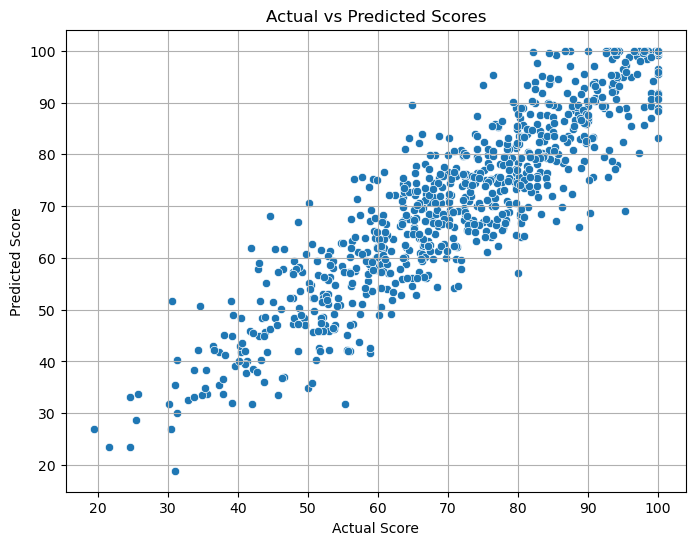

In [616]:
# Visualize our model
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred2)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted Scores")
plt.grid(True)
plt.show()